In [19]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_fill), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_fill[:5000], y_train_fill[5000:]

In [7]:
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.9916 - accuracy: 0.6848 - val_loss: 0.5183 - val_accuracy: 0.8210
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5079 - accuracy: 0.8235 - val_loss: 0.4631 - val_accuracy: 0.8406
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4488 - accuracy: 0.8438 - val_loss: 0.4512 - val_accuracy: 0.8414
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4237 - accuracy: 0.8513 - val_loss: 0.4152 - val_accuracy: 0.8552
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4010 - accuracy: 0.8596 - val_loss: 0.4089 - val_accuracy: 0.8628
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3777 - accuracy: 0.8685 - val_loss: 0.3728 - val_accuracy: 0.8696
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3675 - accuracy: 0.8701 - val_loss: 0.3624 - val_accuracy:

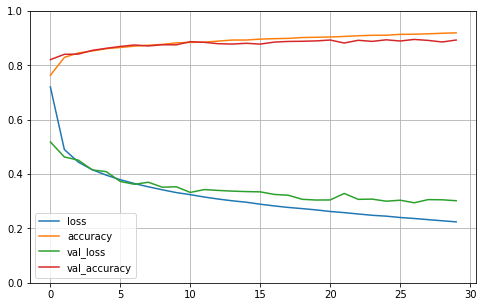

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 935us/step - loss: 59.1871 - accuracy: 0.8611


[59.18711853027344, 0.8611000180244446]

In [15]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
y_pred = model.predict_classes(X_new)

/Users/emaghakyan/projects/ml_book/e2e_ml_project/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [17]:
y_pred

array([9, 2, 1])

In [20]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [21]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)